<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#LGBM-training" data-toc-modified-id="LGBM-training-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LGBM training</a></span><ul class="toc-item"><li><span><a href="#utility" data-toc-modified-id="utility-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>utility</a></span></li><li><span><a href="#hit_type" data-toc-modified-id="hit_type-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>hit_type</a></span></li><li><span><a href="#who" data-toc-modified-id="who-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>who</a></span></li></ul></li></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
from taiko.profile import *
from taiko.tools.database import *

import lightgbm as lgb
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import multiprocessing

Using TensorFlow backend.


In [3]:
pd.DataFrame(data={
    'drummer_name': get_all_drummers()
})

,drummer_name
0,aaaaa
1,carolyn
2,cuxi
3,fatfat
4,eve
5,oliver
6,chris
7,sheep
8,howeverover
9,celiven


In [4]:
create_all_drummer_profiles()

100%|██████████| 12/12 [00:00<00:00, 103.77it/s]


In [5]:
pfs = []
with multiprocessing.Pool() as p:
    drummers = get_all_drummers()
    for id_, pf in tqdm(enumerate(p.imap(get_profile, drummers)), total=len(drummers)):
        pf['who'] = id_
        pfs.append(pf)
        
pf = pd.concat(pfs, ignore_index=True)
# pf['hit_type'] = pf['hit_type'].transform(transform_hit_type)
pf

100%|██████████| 12/12 [00:22<00:00,  1.89s/it]


,L_A_AI,L_G_AI,L_AX_AI,L_AY_AI,L_AZ_AI,L_GX_AI,L_GY_AI,L_GZ_AI,L_A_MMI,L_G_MMI,...,R_GY_FR,R_GZ_FR,R_AXY_CORR,R_AYZ_CORR,R_AZX_CORR,R_GXY_CORR,R_GYZ_CORR,R_GZX_CORR,hit_type,who
0,3.927500,14.963100,0.228400,3.867300,0.617200,3.319500,14.249900,2.261800,3.941200,12.093600,...,92.6209,15.9058,-0.448000,0.811400,-0.661500,0.989800,0.642600,0.698900,1,0
1,4.019000,18.137700,0.070500,3.963100,0.621000,4.220600,17.330800,1.996900,4.004000,19.231300,...,62.9151,55.2246,-0.947400,0.903700,-0.922000,0.914100,0.698600,0.587600,1,0
2,4.023600,13.040000,0.079700,3.986300,0.483700,4.967000,11.224700,-0.638600,4.060300,11.984400,...,81.6192,176.5076,-0.858800,-0.080500,0.170000,0.349500,-0.010100,0.929000,1,0
3,3.881700,11.547700,0.105400,3.812500,0.640100,5.334500,9.484400,-1.547400,3.934000,11.872200,...,255.4595,293.2647,0.107300,0.811400,-0.329200,0.928300,-0.390700,-0.130300,1,0
4,3.918400,17.812500,-0.092400,3.838500,0.661000,8.222800,15.095400,0.788300,3.966300,16.583700,...,601.0376,339.2394,-0.008800,0.514500,-0.385600,0.954600,-0.592000,-0.468800,1,0
5,4.139300,17.030700,-0.197000,4.101400,0.279900,9.494200,6.568900,2.362200,4.262300,14.212800,...,640.8692,301.6815,0.043000,0.150100,0.055500,0.927400,-0.607300,-0.421100,1,0
6,3.981800,18.545700,-0.173500,3.952500,0.047000,9.729600,8.353700,2.160900,4.079200,13.374000,...,434.2682,309.3872,0.744700,0.571100,0.130000,0.766800,-0.812100,-0.320600,1,0
7,4.069900,18.636200,-0.252800,4.022100,-0.131000,7.780800,12.408600,5.296600,4.190800,14.780800,...,321.4752,333.1451,0.781700,0.458400,0.060600,0.420300,-0.544800,0.492000,1,0
8,3.946600,15.926800,-0.132900,3.897900,-0.119400,1.860300,11.057600,6.155400,3.922200,14.780800,...,420.8832,351.6388,0.428300,0.577600,0.229000,0.878200,-0.098100,0.312600,1,0
9,3.875100,18.463300,-0.077100,3.838700,-0.060300,0.527300,12.715600,8.843200,4.064900,17.889300,...,420.8832,327.1698,0.382700,0.549900,0.271200,0.873300,-0.363600,-0.013700,1,0


# LGBM training

## utility

In [6]:
def my_f1_score(y_pred, y):
    y = y.get_label()
    y_pred = y_pred.reshape(len(np.unique(y)), -1).argmax(axis=0)
    return "f1-score", metrics.f1_score(y, y_pred, average="macro"), True

In [7]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4, 5], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

## hit_type

In [9]:
train_df = pf.drop('who', axis=1).copy()

x = train_df.drop(['hit_type'], axis=1)
y = train_df['hit_type']

# train / valid / test = 0.4 / 0.4 / 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, random_state=0, test_size=0.5, stratify=y_train)

y_train

4178    1
2231    1
310     3
3267    6
901     5
4397    3
6785    5
1848    5
6916    0
2153    7
173     0
5203    3
374     5
766     4
1921    6
3241    6
4703    5
6473    2
2338    3
1503    1
6479    2
319     3
1438    0
3060    4
5806    3
4604    4
1290    4
5022    7
3751    5
416     6
       ..
4713    5
2488    4
259     2
2786    7
5811    3
2317    2
2785    7
4314    2
5206    3
398     6
939     6
1444    0
6014    5
6116    6
1926    6
5831    3
3498    2
452     0
6880    6
164     0
6227    0
2847    1
3959    0
5968    5
2754    0
2326    2
4546    4
6839    6
1028    7
6314    1
Name: hit_type, Length: 2800, dtype: int64

In [10]:
train_set = lgb.Dataset(x_train, y_train)
valid_set = lgb.Dataset(x_valid, y_valid, free_raw_data=False)
watchlist = [valid_set]

params = dict({
    'learning_rate': 0.2,
    'application': 'multiclass',
    'num_classes': 8,
#     'min_data_in_leaf': 3,
    'max_depth': 8,
    'num_leaves': 2 ** 6,
    'verbosity': 0
#     'metric': 'multi_logloss'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist,
                  num_boost_round=200, verbose_eval=5, early_stopping_rounds=100, feval=my_f1_score)
y_pred = model.predict(x_test, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[5]	valid_0's f1-score: 0.878047
[10]	valid_0's f1-score: 0.908303
[15]	valid_0's f1-score: 0.917604
[20]	valid_0's f1-score: 0.928588
[25]	valid_0's f1-score: 0.935808
[30]	valid_0's f1-score: 0.939816
[35]	valid_0's f1-score: 0.942713
[40]	valid_0's f1-score: 0.944885
[45]	valid_0's f1-score: 0.94569
[50]	valid_0's f1-score: 0.944307
[55]	valid_0's f1-score: 0.947253
[60]	valid_0's f1-score: 0.947676
[65]	valid_0's f1-score: 0.950602
[70]	valid_0's f1-score: 0.950265
[75]	valid_0's f1-score: 0.952318
[80]	valid_0's f1-score: 0.951942
[85]	valid_0's f1-score: 0.95263
[90]	valid_0's f1-score: 0.953315
[95]	valid_0's f1-score: 0.952557
[100]	valid_0's f1-score: 0.953019
[105]	valid_0's f1-score: 0.953312
[110]	valid_0's f1-score: 0.953298
[115]	valid_0's f1-score: 0.954013
[120]	valid_0's f1-score: 0.954017
[125]	valid_0's f1-score: 0.954342
[130]	valid_0's f1-score: 0.954437
[135]	valid_0's f1-score: 0.956174
[140]	valid_0'

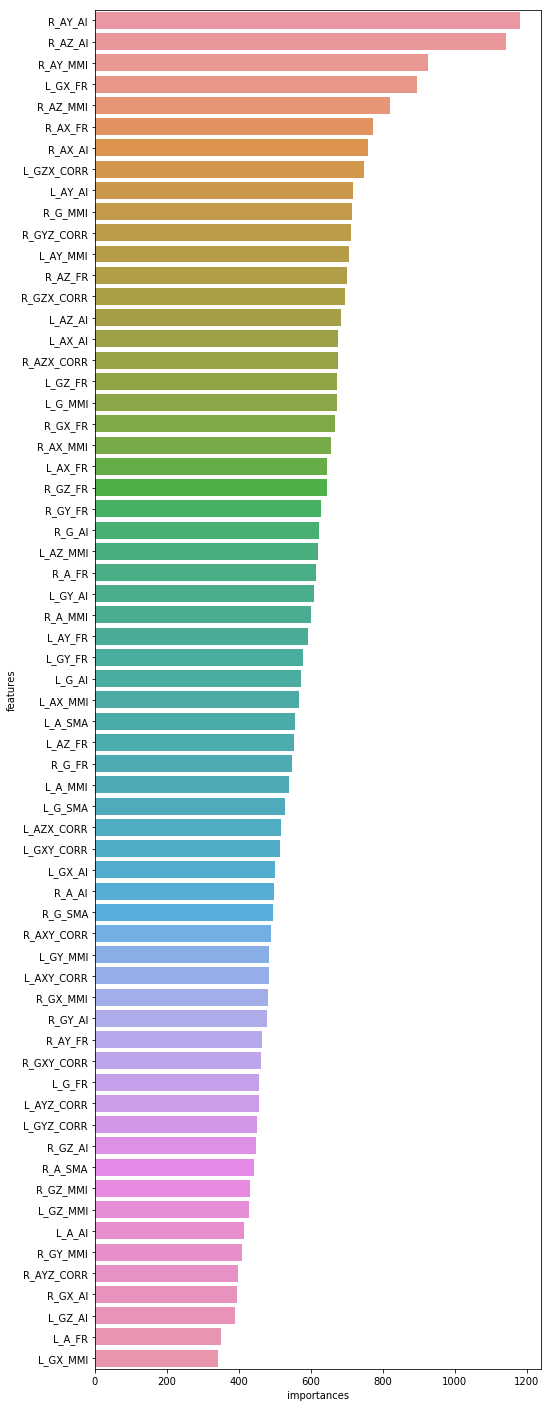

In [11]:
plot_df = pd.DataFrame({'features': train_df.columns[train_df.columns != 'hit_type'],
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)

plt.figure(figsize=(8, 25))
sns.barplot(x = plot_df.importances, y = plot_df.features)
plt.show()

In [12]:
y_preds = []
for y_pred_ in [y_pred]:
    predictions = []
    for x in y_pred_:
        predictions.append(np.argmax(x))
    y_preds.append(pd.Series(data=predictions))

Normalized confusion matrix
[[0.97345133 0.         0.         0.         0.         0.01769912
  0.00884956 0.        ]
 [0.00534759 0.95187166 0.         0.03208556 0.         0.00534759
  0.00534759 0.        ]
 [0.         0.         0.97311828 0.         0.01075269 0.01612903
  0.         0.        ]
 [0.         0.02659574 0.         0.94680851 0.         0.01595745
  0.0106383  0.        ]
 [0.         0.         0.03743316 0.00534759 0.95187166 0.00534759
  0.         0.        ]
 [0.01058201 0.         0.         0.         0.         0.93121693
  0.05291005 0.00529101]
 [0.         0.         0.         0.         0.         0.01587302
  0.97883598 0.00529101]
 [0.01234568 0.         0.         0.         0.         0.05555556
  0.00617284 0.92592593]]


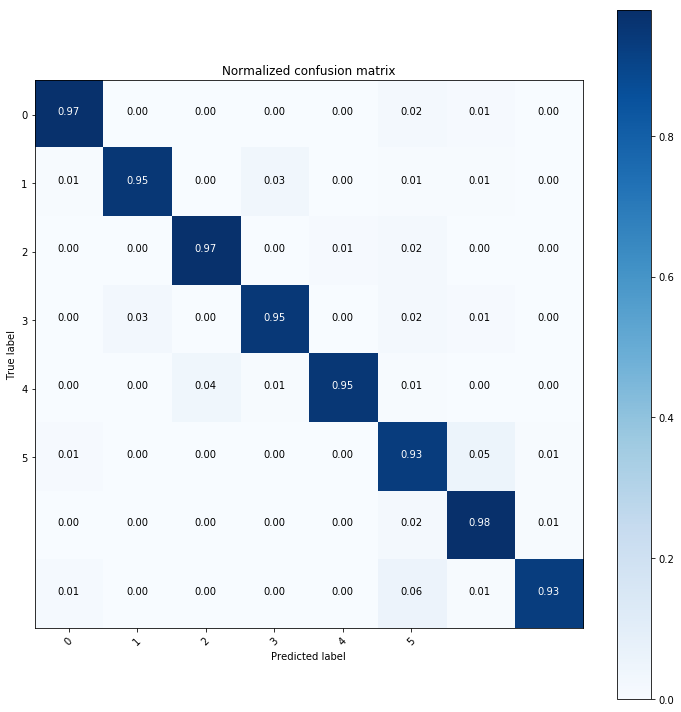

             precision    recall  f1-score   support

          0       0.96      0.97      0.96       113
          1       0.97      0.95      0.96       187
          2       0.96      0.97      0.97       186
          3       0.96      0.95      0.95       188
          4       0.99      0.95      0.97       187
          5       0.89      0.93      0.91       189
          6       0.93      0.98      0.95       189
          7       0.99      0.93      0.96       162

avg / total       0.95      0.95      0.95      1401

0.954446408801086


In [13]:
y_tests = [y_test]
for y_pre, y_tst in zip(y_preds, y_tests):
    cutstom_output_cnf_matrix(y_tst, y_pre)
    print(metrics.classification_report(y_tst, y_pre))
    
    print(metrics.f1_score(y_tst, y_pre, average = 'macro'))

In [14]:
model.save_model('lgbm_model.h5')